In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


import warnings

**Loading the data**

In [132]:
df=pd.read_csv("/content/HousePricePrediction.csv")

**Exploratory Data Analysis**

Taking a look at the first 5 rows of the dataset

In [133]:
df.head() 

,Id,MSSubClass,MSZoning,LotArea,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


Taking a look at the last 5 rows of the dataset

In [134]:
df.tail()

,Id,MSSubClass,MSZoning,LotArea,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2914,2914,160,RM,1936,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN
2918,2918,60,RL,9627,1Fam,5,1993,1994,HdBoard,0.0,996.0,NaN


Learning the dtypes of columns

In [135]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   BldgType      2919 non-null   object 
 5   OverallCond   2919 non-null   int64  
 6   YearBuilt     2919 non-null   int64  
 7   YearRemodAdd  2919 non-null   int64  
 8   Exterior1st   2918 non-null   object 
 9   BsmtFinSF2    2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
 11  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 273.8+ KB


In [136]:
le = LabelEncoder()
df['MSSubClass'] = le.fit_transform(df['MSSubClass'])
df['BldgType'] = le.fit_transform(df['BldgType'])
df['Exterior1st'] = le.fit_transform(df['Exterior1st'])
df['MSZoning'] = le.fit_transform(df['MSZoning'])

In [137]:
df.dtypes

Id                int64
MSSubClass        int64
MSZoning          int64
LotArea           int64
BldgType          int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st       int64
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [138]:
df['MSSubClass'] = df['MSSubClass'].astype(float)
df['MSZoning'] =df['MSZoning'].astype(float)
df['LotArea'] =df['LotArea'].astype(float)
df['BldgType'] = df['BldgType'].astype(float)
df['OverallCond'] = df['OverallCond'].astype(float)
df['YearBuilt'] = df['YearBuilt'].astype(float)
df['YearRemodAdd'] = df['YearRemodAdd'].astype(float)
df['Exterior1st'] = df['Exterior1st'].astype(float)

In [139]:
df.dtypes

Id                int64
MSSubClass      float64
MSZoning        float64
LotArea         float64
BldgType        float64
OverallCond     float64
YearBuilt       float64
YearRemodAdd    float64
Exterior1st     float64
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

Checking the shape of data

In [140]:
df.shape

(2919, 12)

Checking for the missing values

In [141]:
df.isnull().sum() 

Id                 0
MSSubClass         0
MSZoning           0
LotArea            0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        0
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

Getting the statistical summary of dataset

In [142]:
df.describe() 

,Id,MSSubClass,MSZoning,LotArea,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,4.266530,3.030490,10168.114080,0.505653,5.564577,1971.312778,1984.264474,9.625214,49.582248,1051.777587,180921.195890
std,842.787043,4.344907,0.662386,7886.996359,1.206513,1.113131,30.291442,20.894344,3.200303,169.205611,440.766258,79442.502883
min,0.000000,0.000000,0.000000,1300.000000,0.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,34900.000000
25%,729.500000,0.000000,3.000000,7478.000000,0.000000,5.000000,1953.500000,1965.000000,8.000000,0.000000,793.000000,129975.000000
50%,1459.000000,4.000000,3.000000,9453.000000,0.000000,5.000000,1973.000000,1993.000000,12.000000,0.000000,989.500000,163000.000000
75%,2188.500000,6.000000,3.000000,11570.000000,0.000000,6.000000,2001.000000,2004.000000,12.000000,0.000000,1302.000000,214000.000000
max,2918.000000,15.000000,5.000000,215245.000000,4.000000,9.000000,2010.000000,2010.000000,15.000000,1526.000000,6110.000000,755000.000000


Identifying exact number of data types

In [143]:

obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 0
Integer variables: 1
Float variables: 11


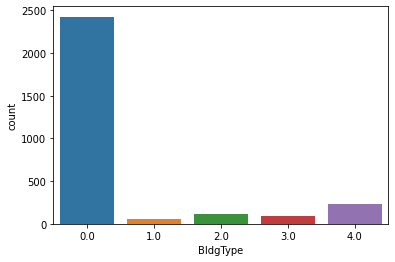

In [144]:
sns.countplot(x ='BldgType', data = df)
 
# Show the plot
plt.show()

In [145]:

## droping the column
df.drop(['Id'],
             axis=1,
             inplace=True)

In [146]:
df.head()

,MSSubClass,MSZoning,LotArea,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,5.0,3.0,8450.0,0.0,5.0,2003.0,2003.0,12.0,0.0,856.0,208500.0
1,0.0,3.0,9600.0,0.0,8.0,1976.0,1976.0,8.0,0.0,1262.0,181500.0
2,5.0,3.0,11250.0,0.0,5.0,2001.0,2002.0,12.0,0.0,920.0,223500.0
3,6.0,3.0,9550.0,0.0,5.0,1915.0,1970.0,13.0,0.0,756.0,140000.0
4,5.0,3.0,14260.0,0.0,5.0,2000.0,2000.0,12.0,0.0,1145.0,250000.0


**Preprocessing**

**Filling Null Values**

In [147]:

df['SalePrice'] = df['SalePrice'].fillna(
  df['SalePrice'].mean())
df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [148]:
## Droping Null Values
df1 = df.dropna() 
df1.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

**Convertions**

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2919 non-null   float64
 1   MSZoning      2919 non-null   float64
 2   LotArea       2919 non-null   float64
 3   BldgType      2919 non-null   float64
 4   OverallCond   2919 non-null   float64
 5   YearBuilt     2919 non-null   float64
 6   YearRemodAdd  2919 non-null   float64
 7   Exterior1st   2919 non-null   float64
 8   BsmtFinSF2    2918 non-null   float64
 9   TotalBsmtSF   2918 non-null   float64
 10  SalePrice     2919 non-null   float64
dtypes: float64(11)
memory usage: 251.0 KB


In [150]:
## Dividing Independent and Dependent Variables
y = df1['SalePrice']
X = df1.drop('SalePrice', axis=1)

In [151]:
print(X.shape)
X.head()


(2918, 10)


,MSSubClass,MSZoning,LotArea,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
0,5.0,3.0,8450.0,0.0,5.0,2003.0,2003.0,12.0,0.0,856.0
1,0.0,3.0,9600.0,0.0,8.0,1976.0,1976.0,8.0,0.0,1262.0
2,5.0,3.0,11250.0,0.0,5.0,2001.0,2002.0,12.0,0.0,920.0
3,6.0,3.0,9550.0,0.0,5.0,1915.0,1970.0,13.0,0.0,756.0
4,5.0,3.0,14260.0,0.0,5.0,2000.0,2000.0,12.0,0.0,1145.0


In [152]:
print(y.shape)
y.head()

(2918,)


0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

**Train & Test Split**

In [153]:
# Split the data into training and validation sets
train_size = int(len(df1) * 0.8) # 70% of the data is used for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print the size of each set
print('Training data:', len(X_train))
print('test data:', len(X_test))

Training data: 2334
test data: 584


In [154]:
print(X_train.shape)

(2334, 10)


**Model Building**

In [155]:
# Create a sample DataFrame with NaN values
df = pd.DataFrame({'A': [1, 2, np.nan, 4],
                   'B': [5, np.nan, 7, 8],
                   'C': [9, 10, 11, 12]})

In [156]:
# Create an instance of SimpleImputer with a mean strategy
imputer = SimpleImputer(strategy='mean')

In [157]:
# Fit and transform the DataFrame using the imputer
imputed_df = pd.DataFrame(imputer.fit_transform(df))

In [158]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [159]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [160]:
# Train the decision tree regression model
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [161]:
# Make predictions on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [162]:

# Calculate the R^2 scores of the model on the training and test sets
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)

In [163]:
from sklearn.metrics import mean_absolute_percentage_error

In [164]:
mean_absolute_percentage_error(y_train,y_train_pred)

0.0014990554171642402

In [165]:
mean_absolute_percentage_error(y_test, y_test_pred)

0.22751522246349223

In [166]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [42]
}

In [167]:
# Create a Decision Tree Regression model
dtree_reg = DecisionTreeRegressor()


In [168]:
# Apply Grid Search Cross Validation to find the best hyperparameters for the model
grid_search = GridSearchCV(dtree_reg, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [42]})

In [169]:
# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_search.best_score_))


Best Hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 2, 'random_state': 42}
Best Mean Cross-validation score: 0.26


In [170]:
model = DecisionTreeRegressor(criterion="absolute_error", max_depth=5)
model.fit(X_train, y_train)


DecisionTreeRegressor(criterion='absolute_error', max_depth=5)

In [171]:
# Make predictions on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [172]:

# Calculate the R^2 scores of the model on the training and test sets
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)

In [173]:
from sklearn.metrics import mean_absolute_percentage_error

In [174]:
mean_absolute_percentage_error(y_train,y_train_pred)

0.1700188761173861

In [175]:
mean_absolute_percentage_error(y_test, y_test_pred)

0.19758930829960406